# Step 35, 고차 미분 계산 그래프 

이번에 추가할 함수는  tanh이다.  
tanh은 쌍곡탄젠트 혹은 하이퍼볼릭 탄젠트라고 읽는다.

$$y=tanh(x) = \frac{e^x-e^{-x}}{e^x+e^{-x}}$$

tanh 함수는 입력을 -1 ~ 1 사이의 값으로 변환한다.  

미분인 $\frac{\partial y}{\partial x}$를 구해보자



## 35.1 tanh 함수 미분 

$$\{\frac{f(x)}{g(x)}\}' = \frac{f'(x)g(x) - f(x)g'(x)}{g(x)^2}$$ 를 이용

$$\frac{\partial tanh(x)}{\partial x} = \frac{(e^x + e^{-x})(e^x + e^{-x}) - (e^x-e^{-x})(e^x-e^{-x})}{(e^x+e^{-x})^2}$$
$$= 1- \frac{(e^x-e^{-x})(e^x-e^{-x})}{(e^x + e^{-x})^2}$$
$$=1- \{\frac{(e^x-e^{-x})}{(e^x + e^{-x})}\}^2$$
$$=1-tanh(x)^2$$
$$=1-y^2$$

## 35.2 tanh 함수 구현 

In [4]:
import numpy as np 
import matplotlib.pyplot as plt 
from dezero import Variable, Function
import dezero.functions as F 

class Tanh(Function):
    def forward(self,x):
        y = np.tanh(x)
        return y 
    
    def backward(self, gy):
        y = self.outputs[0]()
        gx = gy * (1-y*y)
        return gx 

def tanh(x):
    return Tanh()(x)

위 코드도 마찬가지로 dezero 폴더의 functions.py 파일에 추가한다.

## 35.3 고차 미분 계산 그래프 시각화 

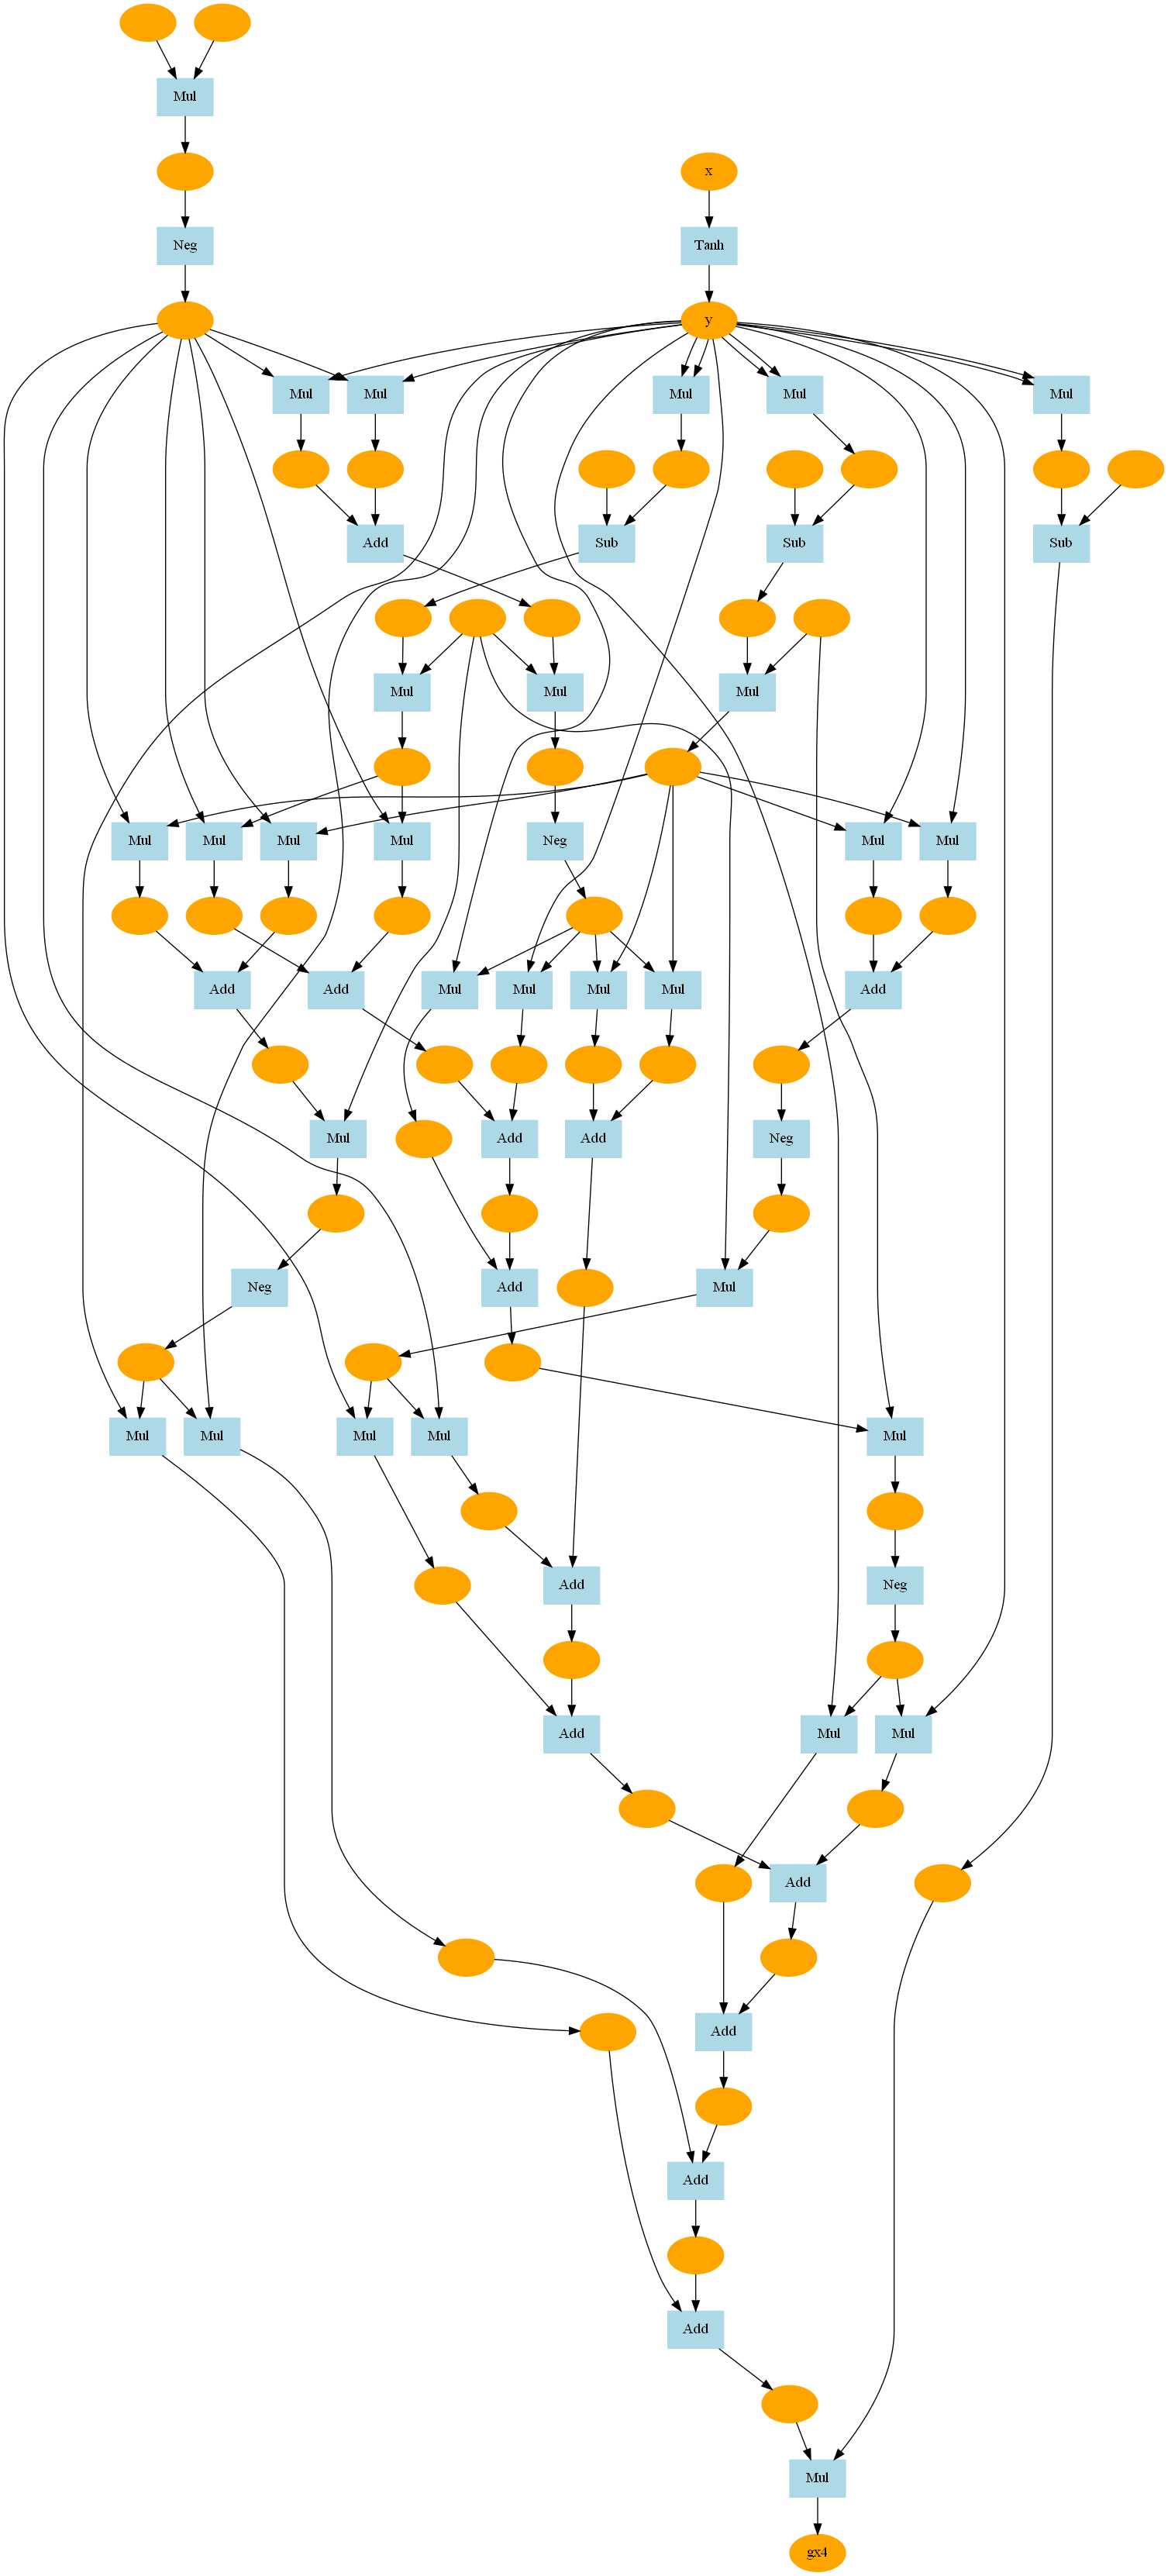

In [2]:
import numpy as np 
from dezero import Variable 
from dezero.utils import plot_dot_graph
import dezero.functions as F 

x = Variable(np.array(1.0))
y = F.tanh(x)
x.name = 'x'
y.name = 'y'
y.backward(create_graph=True)

iters = 3 

for i in range(iters):
    gx = x.grad
    x.cleargrad()
    gx.backward(create_graph=True)

# 계산 그래프 그리기 
gx = x.grad
gx.name = 'gx' + str(iters+1)
plot_dot_graph(gx, verbose=False, to_file='tanh.png')